### Project by Claudio A. Peña W

# Mental Health

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm, probplot
from scipy.stats import zscore

In [3]:
df = pd.read_csv(r'C:\Users\candr\Documents\Jupyter\Portfolio\Suicide_database.csv')

In [4]:
#df.size
df.shape

(27820, 13)

In [5]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [10]:
df.head()

,country,continent,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year($),gdp_per_capita($),generation
0,Albania,Europe,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,Europe,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,Europe,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,Europe,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,Europe,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   continent          27820 non-null  object 
 2   year               27820 non-null  int64  
 3   sex                27820 non-null  object 
 4   age                27820 non-null  object 
 5   suicides_no        27820 non-null  int64  
 6   population         27820 non-null  int64  
 7   suicides/100k pop  27820 non-null  float64
 8   country-year       27820 non-null  object 
 9   HDI for year       8364 non-null   float64
 10   gdp_for_year($)   27820 non-null  object 
 11  gdp_per_capita($)  27820 non-null  int64  
 12  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 2.8+ MB


I'll need to handle those null values after analizing the outliers.

# Analysis 1: Handling Outliers
I want to analyze the outliers from the following perspective: First I need to set a window of +5% and -5% around the mean to determine that every data point beyond this window is an outlier. Then, I need to determine if the proportion of outliers per country exceeds 5% of the data points 
for that specific country.

### 1.1 Setting thresholds

In [17]:
count_suicide_country_year = df.groupby(['country','year'])['suicides_no'].count().reset_index(name='count')
count_suicide_country_year
# Here I notice that every country has 12 records per year

,country,year,count
0,Albania,1987,12
1,Albania,1988,12
2,Albania,1989,12
3,Albania,1992,12
4,Albania,1993,12
...,...,...,...
2316,Uzbekistan,2010,12
2317,Uzbekistan,2011,12
2318,Uzbekistan,2012,12
2319,Uzbekistan,2013,12


Now that I got the number of logs of suicides for every country per year. It's time to determine the mean of suicides per country

Since every country has 12 records, let's get the mean of suicides by country

In [21]:
mean_suicides_country_year = df.groupby(['country'])['suicides_no'].mean().reset_index()
mean_suicides_country_year.columns = ['country','suicides_mean']
mean_suicides_country_year

,country,suicides_mean
0,Albania,7.462121
1,Antigua and Barbuda,0.033951
2,Argentina,221.018817
3,Armenia,6.392617
4,Aruba,0.601190
...,...,...
96,United Arab Emirates,8.638889
97,United Kingdom,367.755376
98,United States,2779.604839
99,Uruguay,39.101190


Now that I got the mean of suicides for every country, it's time to determine what and how many outliers every country has. 

In [230]:
#First, I need to set the upper and lower thresholds per country. let's start by defining a window of +5% and -5% around the mean.

mean_suicides_country_year['Upper_Threshold'] = mean_suicides_country_year['suicides_mean']*1.05
mean_suicides_country_year['Lower_Threshold'] = mean_suicides_country_year['suicides_mean']*0.95

In [232]:
# sizes = [df.shape,mean_suicides_country_year.shape]
# sizes

In [234]:
#This is a left join method applied on both dataframes to handle outliers from a single dataframe.
merged_df = df.merge(mean_suicides_country_year,on = 'country', how = 'left')
merged_df.head(2)

,country,continent,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year($),gdp_per_capita($),generation,z_score,decade,suicides_mean,Upper_Threshold,Lower_Threshold
0,Albania,Europe,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,1.608952,1980s,7.462121,7.835227,7.089015
1,Albania,Europe,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,1.014711,1980s,7.462121,7.835227,7.089015


In [30]:
outlier_df = merged_df[(merged_df['suicides_no']> merged_df['Upper_Threshold']) | (merged_df['suicides_no'] < merged_df['Lower_Threshold'])]
outlier_df.shape

(27025, 16)

In [32]:
df.shape

(27820, 13)

After applying +-5% threshold around the mean to every country, I noticed that the amount of outliers are worthless.
However, the following two boxplots show that every country might have outliers that will affect the overall analysis.

In [35]:
# df_single = df['country']
# # df.drop_duplicates(subset=['country','year'])
# df_single = df_single.drop_duplicates()
# df_single

<Axes: xlabel='country', ylabel='suicides_no'>

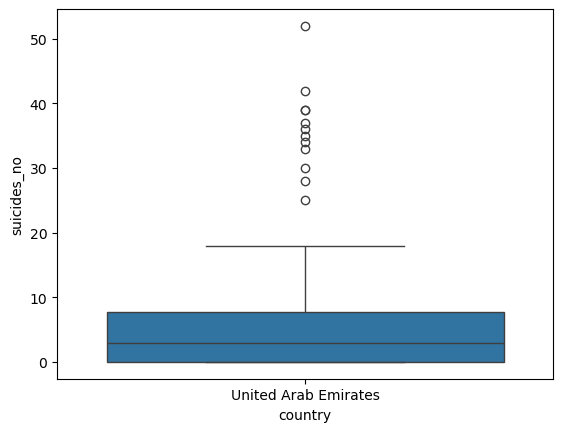

In [37]:
df_country = df[df['country'] == 'United Arab Emirates']
sns.boxplot(x = 'country', y = 'suicides_no', data = df_country, showfliers=True)  #where x is the categorical column and y is the numerical column in the DataFrame df.


<Axes: xlabel='country', ylabel='suicides_no'>

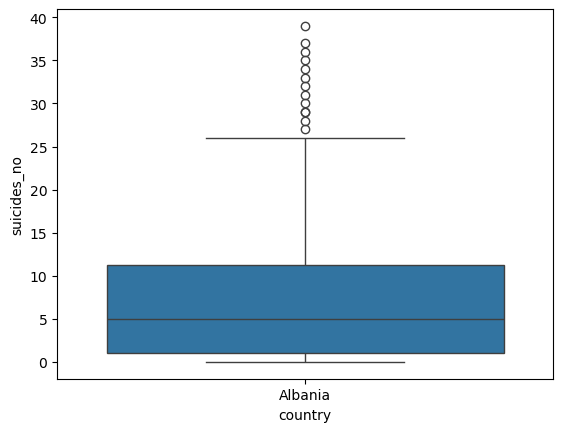

In [38]:
df_country = df[df['country'] == 'Albania']
sns.boxplot(x = 'country', y = 'suicides_no', data = df_country, showfliers=True)  #where x is the categorical column and y is the numerical column in the DataFrame df.


In the case of United Arab Emirates, there are 11 outliers out of 72 data points. On the other hand, Albania doesn't have outlier. Since the ouliers in UAE affect the analysis for this country, I presume I need to approach the outliers using another strategy.

### 1.2 Calculating Z-Scores

In [43]:
# Calculate z-scores within each country
df['z_score'] = df.groupby('country')['suicides_no'].transform(lambda x: zscore(x, ddof=1))

#Groups the data by country. Applies the z-score calculation to each group, standardizing the 'suicides_no' column.
#The transform function is used to perform operations on a group level and then return a DataFrame that is the same 
#shape as the original DataFrame. In this case, the transformation involves calculating the z-score for each value 
#within each group of data defined by the 'country' column.

Z-scores above 3 or below -3 are typically considered outliers.
Identifying outliers with z-scores under -3 or over +3 gives an absolute values perspective. 
That is to say, I look to identify specific data points that meet the outlier criteria.

In [46]:
# Define outliers as those beyond ±3 standard deviations
threshold = 3 
outliers = df[(df['z_score'] > threshold) | (df['z_score'] < -threshold)]
outliers


,country,continent,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year($),gdp_per_capita($),generation,z_score
96,Albania,Europe,1997,male,25-34 years,36,236000,15.25,Albania1997,NaN,"2,359,903,108",793,Generation X,3.391674
97,Albania,Europe,1997,male,15-24 years,33,244400,13.50,Albania1997,NaN,"2,359,903,108",793,Generation X,3.035130
145,Albania,Europe,2001,male,35-54 years,34,378826,8.98,Albania2001,NaN,"4,060,758,804",1451,Boomers,3.153978
158,Albania,Europe,2002,male,35-54 years,35,382139,9.16,Albania2002,NaN,"4,435,078,648",1573,Boomers,3.272826
181,Albania,Europe,2004,male,35-54 years,39,391767,9.95,Albania2004,NaN,"7,314,865,176",2544,Boomers,3.748219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27198,United States,North America,2014,male,35-54 years,11455,41858354,27.37,United States2014,0.915,"17,427,609,000,000",58531,Generation X,3.151576
27210,United States,North America,2015,male,35-54 years,11634,41658010,27.93,United States2015,NaN,"18,120,714,000,000",60387,Generation X,3.216603
27402,Uruguay,South America,2002,male,35-54 years,152,381763,39.82,Uruguay2002,NaN,"13,606,494,599",4439,Boomers,3.069540
27533,Uruguay,South America,2014,male,35-54 years,150,421245,35.61,Uruguay2014,0.793,"57,236,013,086",18012,Generation X,3.015163


In [48]:
df_out = outliers.groupby('country')['suicides_no'].count().reset_index(name='count of outliers')
# df_out.columns = ['country','count of outliers']
df_out
#It shows the number of suicides that are considered outlier per country

,country,count of outliers
0,Albania,6
1,Antigua and Barbuda,10
2,Armenia,3
3,Aruba,6
4,Australia,4
...,...,...
77,United Arab Emirates,1
78,United Kingdom,6
79,United States,8
80,Uruguay,2


In [50]:
df_count = df.groupby('country')['suicides_no'].count().reset_index(name='count of data points')
# df_count.columns = ['country','count of data points']
df_count
#It shows the count of datapoints per country

,country,count of data points
0,Albania,264
1,Antigua and Barbuda,324
2,Argentina,372
3,Armenia,298
4,Aruba,168
...,...,...
96,United Arab Emirates,72
97,United Kingdom,372
98,United States,372
99,Uruguay,336


In [52]:
df_out = df_out.merge(df_count, on='country', how='left')

In [54]:
df_out.columns = ['country', 'Count of outliers', 'Total count of records']
df_out.head(3)

,country,Count of outliers,Total count of records
0,Albania,6,264
1,Antigua and Barbuda,10,324
2,Armenia,3,298


Now that I found these data points that are beyond ±3 standard deviations, let's give the analysis a relative perspective by comparing them to a threshold (5%) . That is to day, we look to evaluates the significance of these outliers by comparing their proportion to a threshold

In [57]:
df_out['Worthy'] = df_out.apply(lambda myfcn: 'Delete outliers' if myfcn['Count of outliers'] < myfcn['Total count of records']*0.95 else 'Keep the outliers', axis =1)
df_out

,country,Count of outliers,Total count of records,Worthy
0,Albania,6,264,Delete outliers
1,Antigua and Barbuda,10,324,Delete outliers
2,Armenia,3,298,Delete outliers
3,Aruba,6,168,Delete outliers
4,Australia,4,360,Delete outliers
...,...,...,...,...
77,United Arab Emirates,1,72,Delete outliers
78,United Kingdom,6,372,Delete outliers
79,United States,8,372,Delete outliers
80,Uruguay,2,336,Delete outliers


In [59]:
df_out[df_out['Worthy'] == 'Keep the outliers']

,country,Count of outliers,Total count of records,Worthy


Since the dataset of outliers for each country represents less than 5% of the total data points for that country, it is worthwhile to delete them.

In [62]:
outliers.shape

(439, 14)

In [64]:
#Remove the outliers using the index
idx_outls = outliers.index.tolist()

In [66]:
# filtered_df = df.iloc[idx_outls]
df_filtered = df.drop(idx_outls)
df_filtered.shape

(27381, 14)

In [68]:
df.shape
#The original data frame -df- is clean from outliers.

(27820, 14)

# Analysis 2: Handling missing data points
From the info method, I want to analyze what would be the best strategy to handle the blanks in HDI column.

A quick math confirms that the amount of missing values correspond to the 70% of the dataset

In [72]:
8364*100/27820

30.0647016534867

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   continent          27820 non-null  object 
 2   year               27820 non-null  int64  
 3   sex                27820 non-null  object 
 4   age                27820 non-null  object 
 5   suicides_no        27820 non-null  int64  
 6   population         27820 non-null  int64  
 7   suicides/100k pop  27820 non-null  float64
 8   country-year       27820 non-null  object 
 9   HDI for year       8364 non-null   float64
 10   gdp_for_year($)   27820 non-null  object 
 11  gdp_per_capita($)  27820 non-null  int64  
 12  generation         27820 non-null  object 
 13  z_score            27772 non-null  float64
dtypes: float64(3), int64(4), object(7)
memory usage: 3.0+ MB


I notice that running an imputation algorithm in this case may be complex due to the amount of missing data. Since, I found missing values represent more than 20% of the dataset, I need to reconsider leading my analisis using HDI. 

# Analysis 3: Exploring the database

In [78]:
def decade(year):
    if  1980 <= year <= 1989:
        return '1980s'
    elif 1990 <= year <= 1999:
        return '1990s'
    elif 2000 <= year <= 2009:
        return '2000s'
    elif 2010 <= year <= 2020:
        return '2010s'
    else:
        return 'Unknown'

In [80]:
df['decade'] = df['year'].apply(decade)

In [82]:
df[df['decade']=='Unknown']

#This is the way to confirm that every row has a decade

,country,continent,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year($),gdp_per_capita($),generation,z_score,decade


### 3.1 Asia

#
Using the mean suicide_no: This will give you the absolute number of suicides for each country. It's useful if you want to highlight the raw scale of the issue in countries with larger populations. However, it can be misleading because countries with larger populations will naturally have higher numbers of suicides.

Using the mean suicides/100k pop: This standardized metric allows for a fair comparison between countries regardless of population size. It’s particularly useful for identifying patterns, trends, or outliers in suicide rates across countries and can better highlight which countries have disproportionately high or low rates relative to their population.

Therefore, this analysis goes with the mean suicides/100k pop

In [101]:
asian_df = df[df['continent'] == 'Asia'] #Filters by Asian countries
asian_df = asian_df[['country', 'suicides/100k pop','decade']] # Brings only three columns from the dataset.
asian_df = asian_df.groupby(['country','decade'])['suicides/100k pop'].mean().reset_index() #It groups by country and calculates the man from the suicide_no column
asian_df

,country,decade,suicides/100k pop
0,Azerbaijan,1990s,1.709417
1,Azerbaijan,2000s,2.098750
2,Bahrain,1980s,1.961111
3,Bahrain,1990s,0.623889
4,Bahrain,2000s,2.747000
...,...,...,...
62,United Arab Emirates,2000s,1.203000
63,United Arab Emirates,2010s,1.892500
64,Uzbekistan,1990s,9.633417
65,Uzbekistan,2000s,7.265238


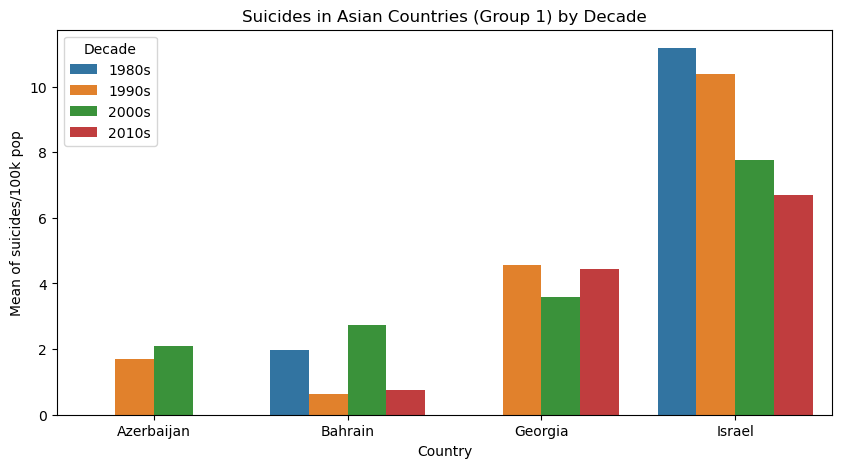

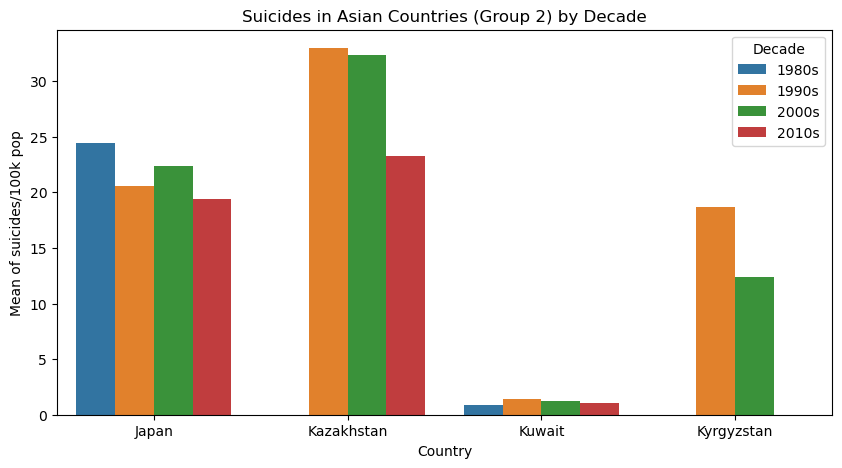

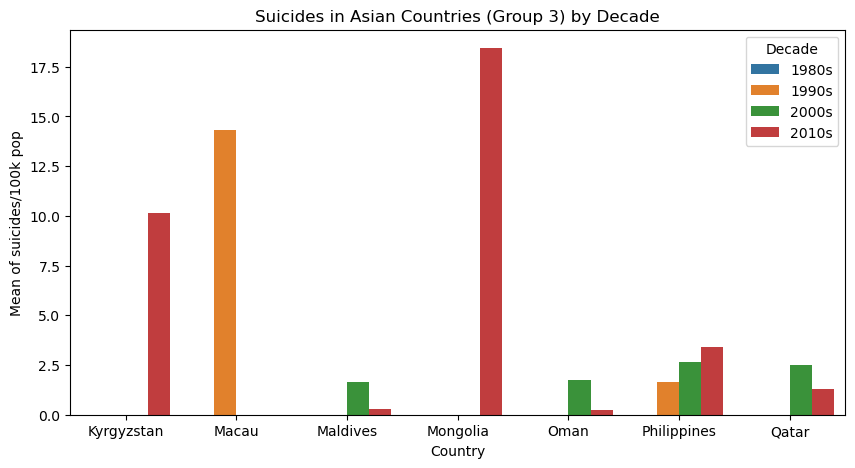

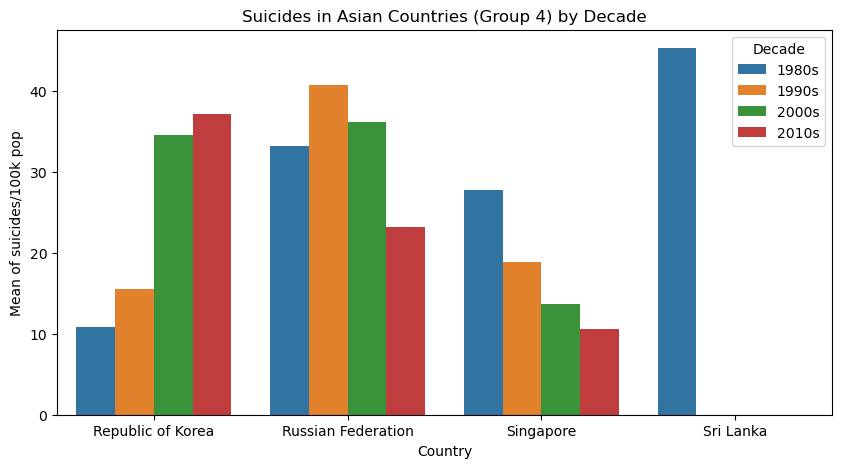

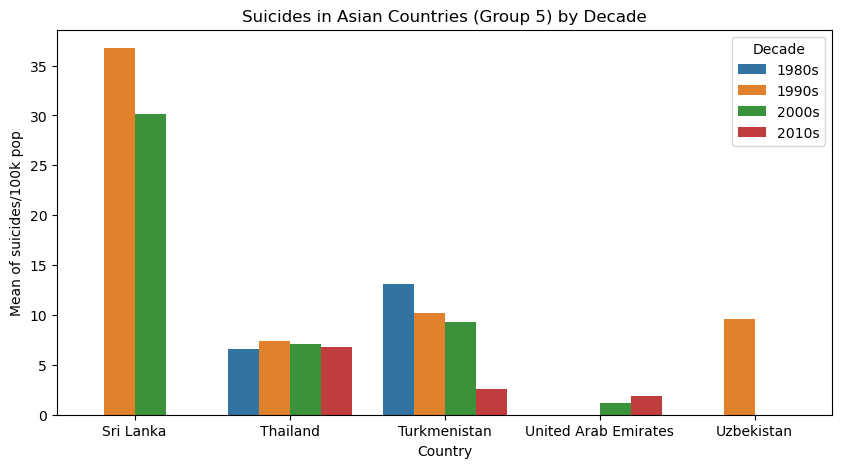

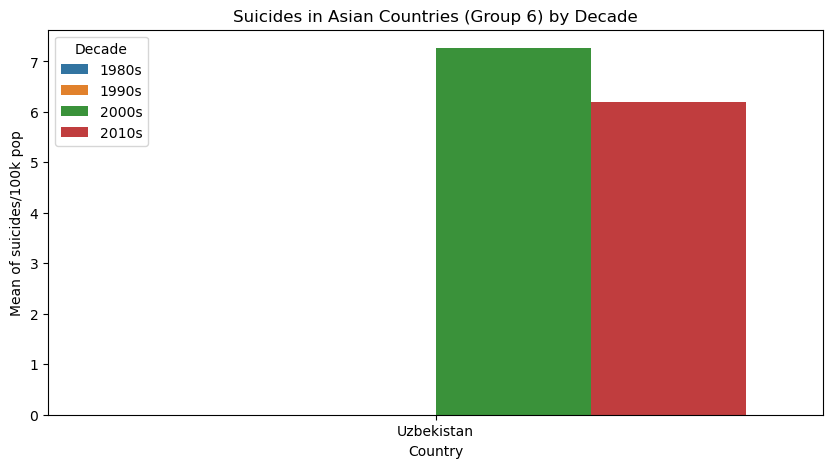

In [105]:
num_plots = 5 # Number of plots
chunk_size = len(asian_df) // num_plots #Determines the amount of rows from the dataframe

#Create bar plots for each chunk
for i in range(0, len(asian_df), chunk_size):
    plt.figure(figsize=(10, 5))
    chunk = asian_df.iloc[i:i + chunk_size] #Slices the dataframe into smaller chunks.
    sns.barplot(data=chunk, x='country', y='suicides/100k pop', hue='decade', hue_order = ['1980s','1990s','2000s','2010s'])
    plt.title(f'Suicides in Asian Countries (Group {i // chunk_size + 1}) by Decade') 
    plt.xlabel('Country') 
    plt.ylabel('Mean of suicides/100k pop') 
    plt.legend(title='Decade')
    

### 3.2 Europe

In [107]:
europe_df = df[df['continent'] == 'Europe'] #Filters by Asian countries
europe_df = europe_df[['country', 'suicides/100k pop','decade']] # Brings only three columns from the dataset.
europe_df = europe_df.groupby(['country','decade'])['suicides/100k pop'].mean().reset_index() #It groups by country and calculates the man from the suicide_no column
europe_df

,country,decade,suicides/100k pop
0,Albania,1980s,2.714167
1,Albania,1990s,3.965313
2,Albania,2000s,3.372667
3,Albania,2010s,3.471667
4,Armenia,1990s,3.490000
...,...,...,...
129,Ukraine,2010s,21.512667
130,United Kingdom,1980s,9.100167
131,United Kingdom,1990s,7.876167
132,United Kingdom,2000s,6.741750


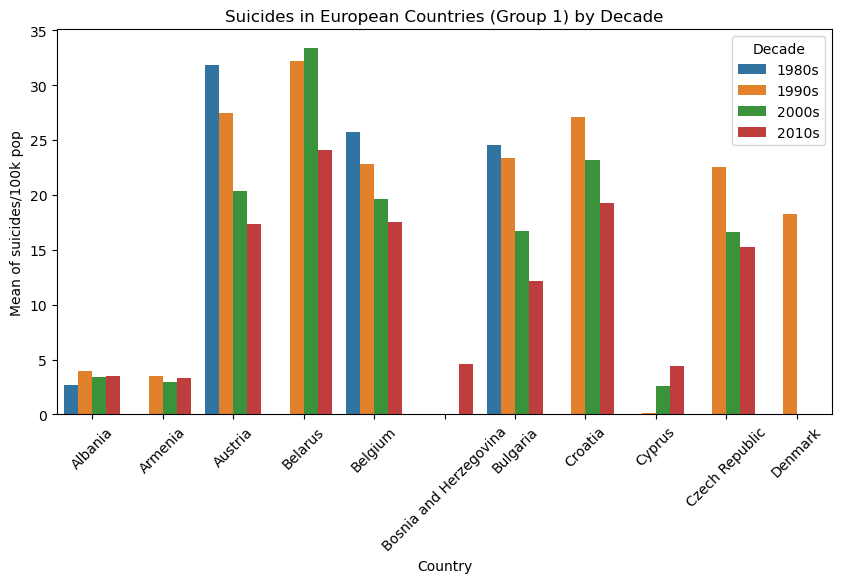

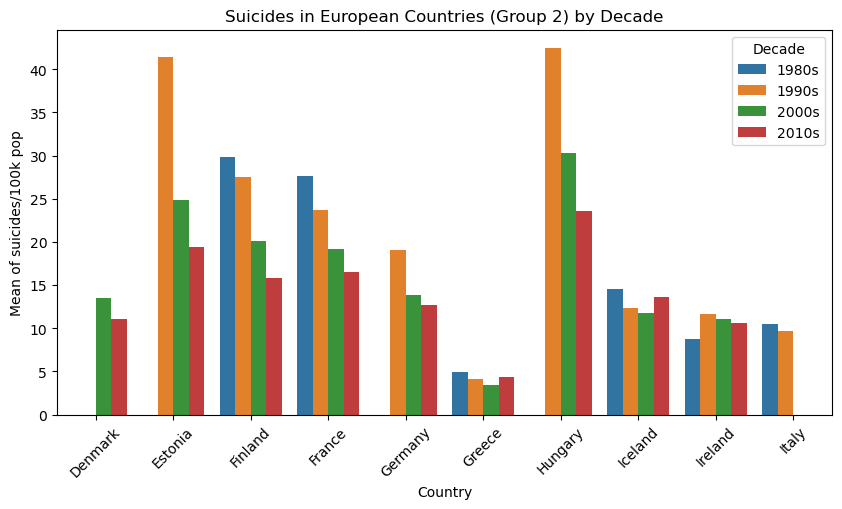

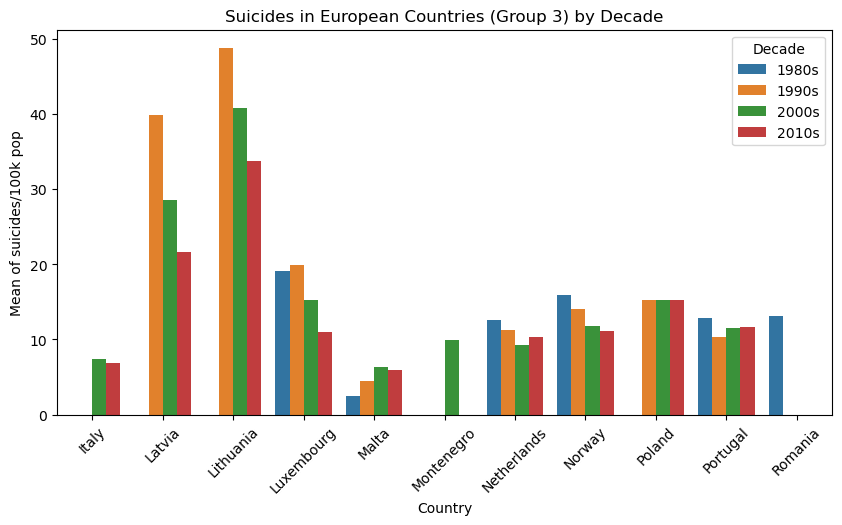

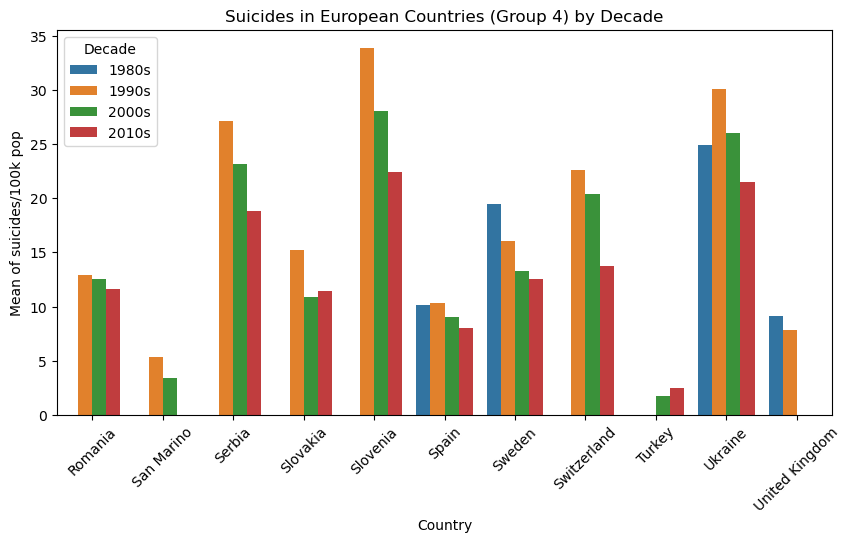

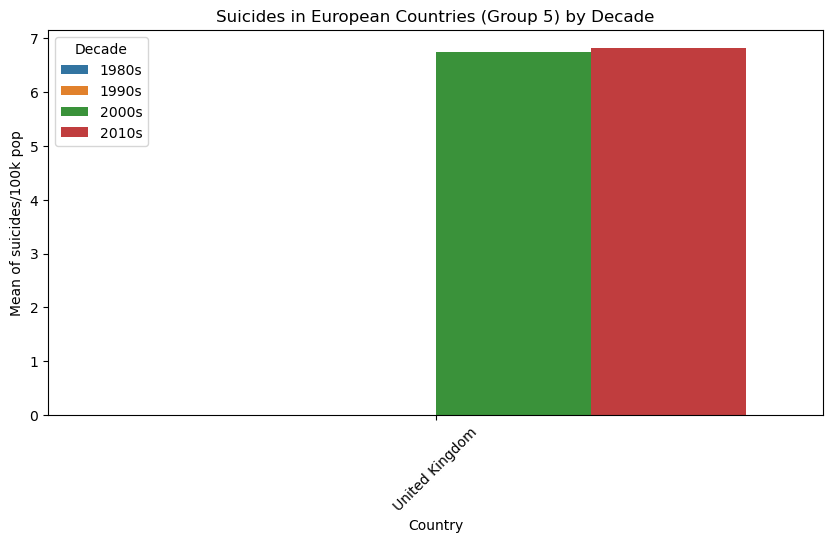

In [156]:
num_plots = 4 # Number of plots
chunk_size = len(europe_df) // num_plots #Determines the amount of rows from the dataframe

#Create bar plots for each chunk
for i in range(0, len(europe_df), chunk_size):
    plt.figure(figsize=(10, 5))
    chunk = europe_df.iloc[i:i + chunk_size] #Slices the dataframe into smaller chunks.
    sns.barplot(data=chunk, x='country', y='suicides/100k pop', hue='decade', hue_order = ['1980s','1990s','2000s','2010s'])
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    
    plt.title(f'Suicides in European Countries (Group {i // chunk_size + 1}) by Decade') 
    plt.xlabel('Country') 
    plt.ylabel('Mean of suicides/100k pop') 
    plt.legend(title='Decade')

### 3.3 Oceania

In [116]:
oceania_df = df[df['continent'] == 'Oceania'] #Filters by Asian countries
oceania_df = oceania_df[['country', 'suicides/100k pop','decade']] # Brings only three columns from the dataset.
oceania_df = oceania_df.groupby(['country','decade'])['suicides/100k pop'].mean().reset_index() #It groups by country and calculates the man from the suicide_no column
oceania_df

,country,decade,suicides/100k pop
0,Australia,1980s,14.590833
1,Australia,1990s,14.223833
2,Australia,2000s,11.552222
3,Australia,2010s,11.770278
4,Fiji,2000s,4.401019
5,Fiji,2010s,8.272917
6,Kiribati,1990s,8.134352
7,Kiribati,2000s,0.000000
8,New Zealand,1980s,15.641333
9,New Zealand,1990s,15.657917


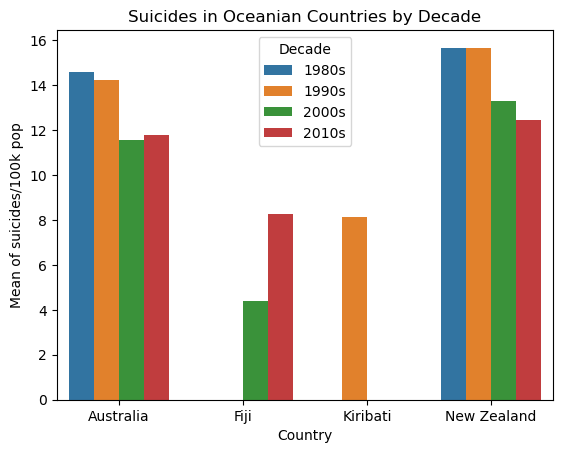

In [118]:
sns.barplot(data=oceania_df, x='country', y='suicides/100k pop', hue='decade', hue_order = ['1980s','1990s','2000s','2010s'])
plt.title(f'Suicides in Oceanian Countries by Decade') 
plt.xlabel('Country') 
plt.ylabel('Mean of suicides/100k pop') 
plt.legend(title='Decade')

### 3.4 Africa

In [120]:
africa_df = df[df['continent'] == 'Africa'] #Filters by Asian countries
africa_df = africa_df[['country', 'suicides/100k pop','decade']] # Brings only three columns from the dataset.
africa_df = africa_df.groupby(['country','decade'])['suicides/100k pop'].mean().reset_index() #It groups by country and calculates the man from the suicide_no column
africa_df

,country,decade,suicides/100k pop
0,Cabo Verde,2010s,11.153333
1,Mauritius,1980s,13.381500
2,Mauritius,1990s,14.348083
3,Mauritius,2000s,9.845083
4,Mauritius,2010s,9.250122
5,Seychelles,1980s,6.671111
6,Seychelles,2000s,9.099352
7,Seychelles,2010s,5.455694
8,South Africa,1990s,0.657292
9,South Africa,2000s,1.008333


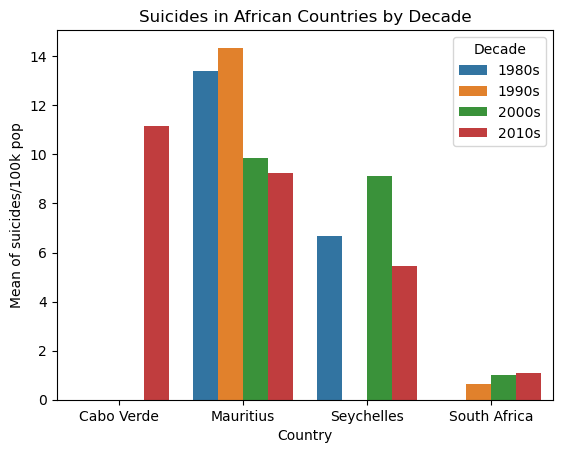

In [122]:
sns.barplot(data=africa_df, x='country', y='suicides/100k pop', hue='decade', hue_order = ['1980s','1990s','2000s','2010s'])
plt.title(f'Suicides in African Countries by Decade') 
plt.xlabel('Country') 
plt.ylabel('Mean of suicides/100k pop') 
plt.legend(title='Decade')

### 3.5 North America

In [126]:
n_america_df = df[df['continent'] == 'North America'] #Filters by Asian countries
n_america_df = n_america_df[['country', 'suicides/100k pop','decade']] # Brings only three columns from the dataset.
n_america_df = n_america_df.groupby(['country','decade'])['suicides/100k pop'].mean().reset_index() #It groups by country and calculates the man from the suicide_no column
n_america_df

,country,decade,suicides/100k pop
0,Canada,1980s,14.704333
1,Canada,1990s,13.406083
2,Canada,2000s,11.075583
3,Canada,2010s,10.805417
4,United States,1980s,15.636333
5,United States,1990s,14.310583
6,United States,2000s,12.381000
7,United States,2010s,13.886111


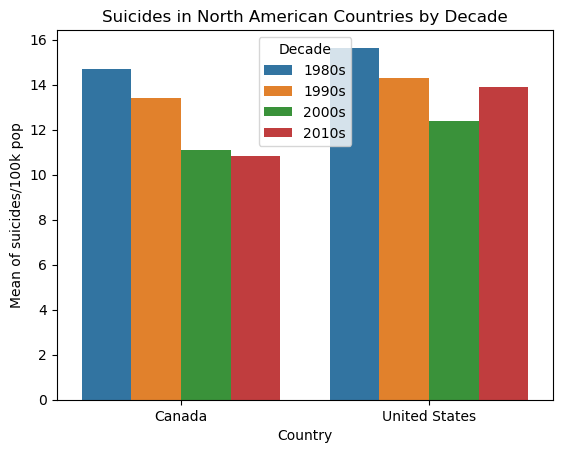

In [128]:
sns.barplot(data=n_america_df, x='country', y='suicides/100k pop', hue='decade', hue_order = ['1980s','1990s','2000s','2010s'])
plt.title(f'Suicides in North American Countries by Decade') 
plt.xlabel('Country') 
plt.ylabel('Mean of suicides/100k pop') 
plt.legend(title='Decade')

### 3.6 Central America

In [131]:
c_america_df = df[df['continent'] == 'Central America'] #Filters by Asian countries
c_america_df = c_america_df[['country', 'suicides/100k pop','decade']] # Brings only three columns from the dataset.
c_america_df = c_america_df.groupby(['country','decade'])['suicides/100k pop'].mean().reset_index() #It groups by country and calculates the man from the suicide_no column
c_america_df

,country,decade,suicides/100k pop
0,Antigua and Barbuda,1980s,0.000000
1,Antigua and Barbuda,1990s,0.335833
2,Antigua and Barbuda,2000s,1.094000
3,Antigua and Barbuda,2010s,0.325417
4,Aruba,1990s,17.665833
...,...,...,...
63,Saint Vincent and Grenadines,2010s,4.277222
64,Trinidad and Tobago,1980s,12.262500
65,Trinidad and Tobago,1990s,15.210667
66,Trinidad and Tobago,2000s,13.577417


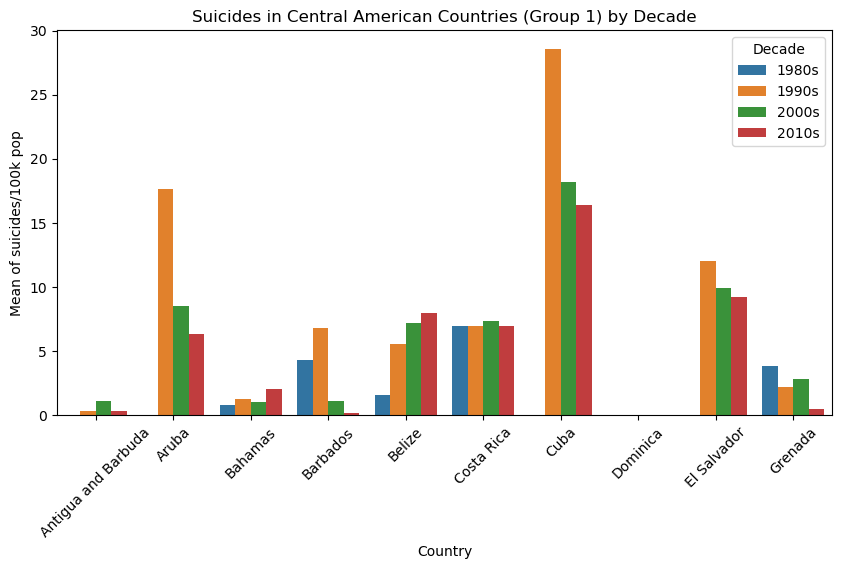

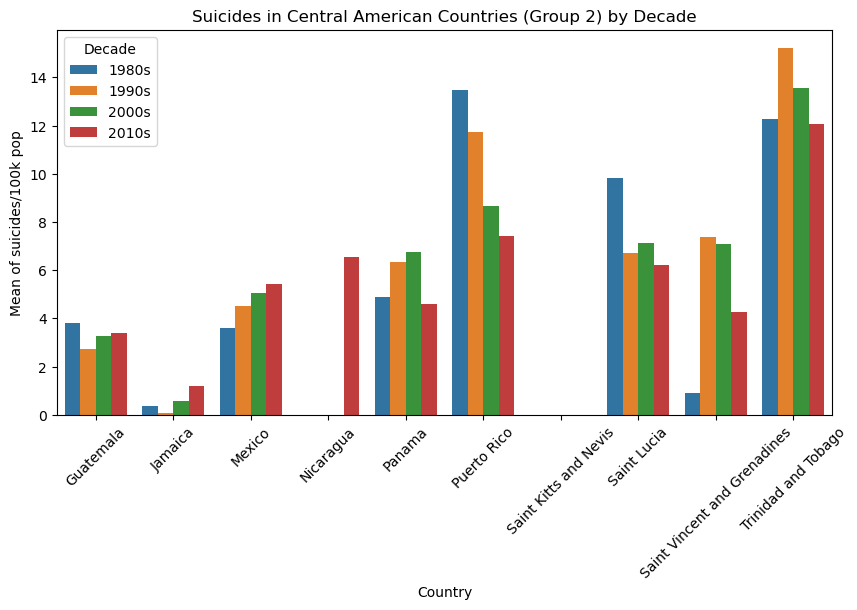

In [152]:
num_plots = 2 # Number of plots
chunk_size = len(c_america_df) // num_plots #Determines the amount of rows from the dataframe

#Create bar plots for each chunk
for i in range(0, len(c_america_df), chunk_size):
    plt.figure(figsize=(10, 5))
    chunk = c_america_df.iloc[i:i + chunk_size] #Slices the dataframe into smaller chunks.
    sns.barplot(data=chunk, x='country', y='suicides/100k pop', hue='decade', hue_order = ['1980s','1990s','2000s','2010s'])
    plt.title(f'Suicides in Central American Countries (Group {i // chunk_size + 1}) by Decade') 
    plt.xlabel('Country') 
    plt.ylabel('Mean of suicides/100k pop') 
    plt.legend(title='Decade')
    plt.xticks(rotation=45)

### 3.7 South America

In [136]:
s_america_df = df[df['continent'] == 'South America'] #Filters by Asian countries
s_america_df = s_america_df[['country', 'suicides/100k pop','decade']] # Brings only three columns from the dataset.
s_america_df = s_america_df.groupby(['country','decade'])['suicides/100k pop'].mean().reset_index() #It groups by country and calculates the man from the suicide_no column
s_america_df

,country,decade,suicides/100k pop
0,Argentina,1980s,11.958667
1,Argentina,1990s,10.177833
2,Argentina,2000s,10.765833
3,Argentina,2010s,9.219861
4,Brazil,1980s,5.264000
5,Brazil,1990s,5.898000
6,Brazil,2000s,5.896167
7,Brazil,2010s,6.160833
8,Chile,1980s,8.076833
9,Chile,1990s,8.287250


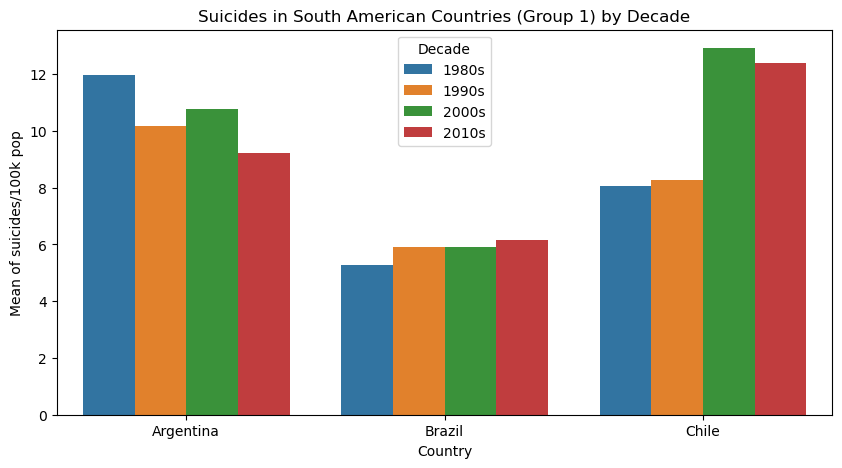

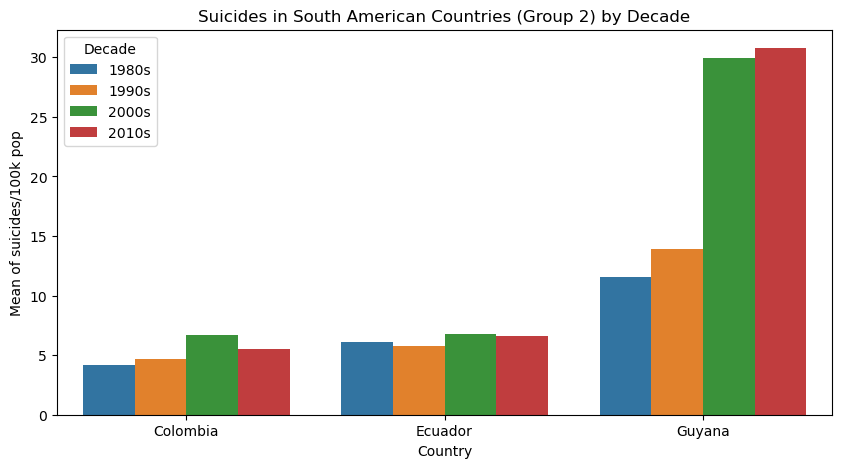

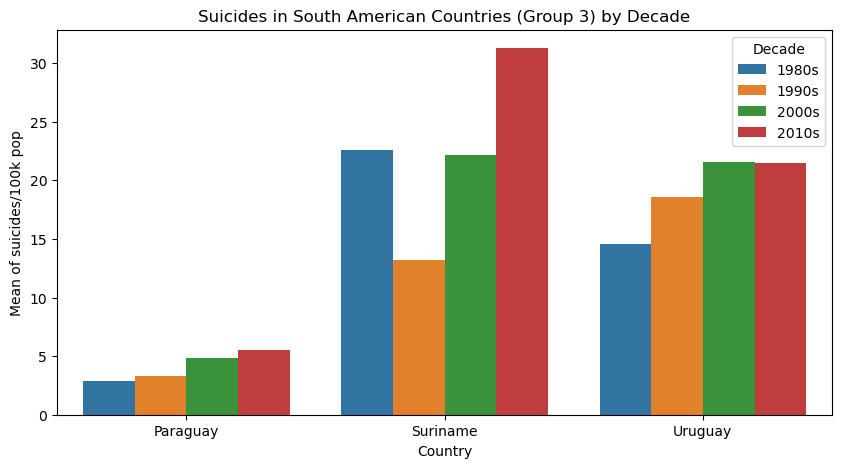

In [144]:
num_plots = 3 # Number of plots
chunk_size = len(s_america_df) // num_plots #Determines the amount of rows from the dataframe

#Create bar plots for each chunk
for i in range(0, len(s_america_df), chunk_size):
    plt.figure(figsize=(10, 5))
    chunk = s_america_df.iloc[i:i + chunk_size] #Slices the dataframe into smaller chunks.
    sns.barplot(data=chunk, x='country', y='suicides/100k pop', hue='decade', hue_order = ['1980s','1990s','2000s','2010s'])
    plt.title(f'Suicides in South American Countries (Group {i // chunk_size + 1}) by Decade') 
    plt.xlabel('Country') 
    plt.ylabel('Mean of suicides/100k pop') 
    plt.legend(title='Decade')

### 3.8 Generation Vs Decade

In [158]:
df['generation'].drop_duplicates()

0         Generation X
1               Silent
3      G.I. Generation
4              Boomers
44          Millenials
226       Generation Z
Name: generation, dtype: object

In [160]:
pie1 = df.groupby(['generation'], as_index=False)['suicides_no'].mean() 
# pie1 = df.groupby(['generation','decade'])['suicides_no'].mean().reset_index() # this is another way to group by
pie1.head()

,generation,suicides_no
0,Boomers,457.815230
1,G.I. Generation,185.863338
2,Generation X,239.201623
3,Generation Z,10.820408
4,Millenials,106.683607


In [162]:
pie2 = df.groupby(['decade'], as_index=False)['suicides_no'].mean() 
pie2.head()

,decade,suicides_no
0,1980s,214.091965
1,1990s,265.417361
2,2000s,236.670256
3,2010s,233.920137


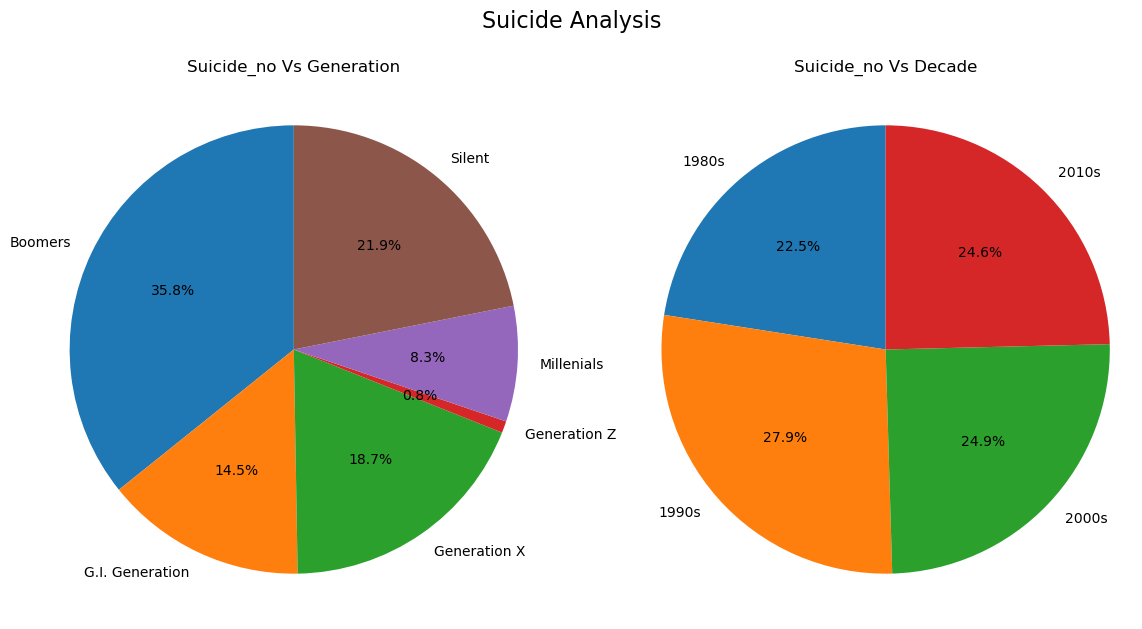

In [164]:
import matplotlib.pyplot as plt
size1 = pie1['suicides_no']
labels1 = pie1['generation']

size2 = pie2['suicides_no']
labels2 = pie2['decade']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.pie(size1, labels=labels1, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle. 
ax1.set_title('Suicide_no Vs Generation') 


ax2.pie(size2, labels=labels2, autopct='%1.1f%%', startangle=90) 
ax2.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle. 
ax2.set_title('Suicide_no Vs Decade') 

plt.suptitle('Suicide Analysis', fontsize=16)
plt.show()

### 3.9 Trend of suicide along age groups

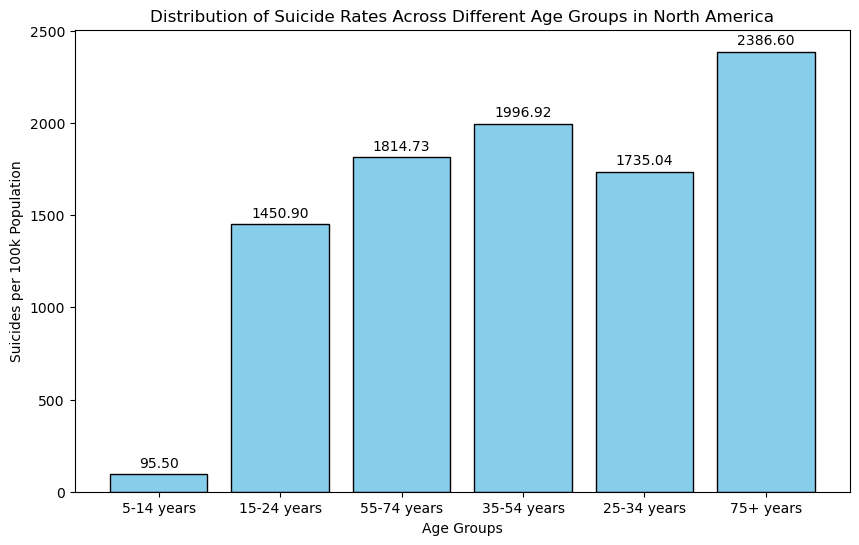

In [169]:
#Filtering North America
df_NA = df[df['continent']=='North America']

#Defining age groups order 
age_order = ['5-14 years', '15-24 years', '55-74 years', '35-54 years', '25-34 years', '75+ years']
# Convert the age group column to categorical with the defined order 
df_NA.loc[:,'age'] = pd.Categorical(df_NA['age'], categories=age_order, ordered=True)
# Grouping by the ages and calculating the mean per 100 k population
agegroup_df = df_NA.groupby(['age'],as_index=False)['suicides/100k pop'].sum()

# Maintain the age sort according to age_order
agegroup_df = agegroup_df.sort_values(by='age', key=lambda x: pd.Categorical(x, categories=age_order, ordered=True))

# # Plotting histogram 
fig, ax = plt.subplots(figsize=(10, 6)) 
bars = ax.bar(agegroup_df['age'], agegroup_df['suicides/100k pop'], color='skyblue', edgecolor='black') 

# Add values on top of each bar 
ax.bar_label(bars, fmt='%.2f', padding=3)

plt.title('Distribution of Suicide Rates Across Different Age Groups in North America') 
plt.xlabel('Age Groups') 
plt.ylabel('Suicides per 100k Population') 
plt.show()

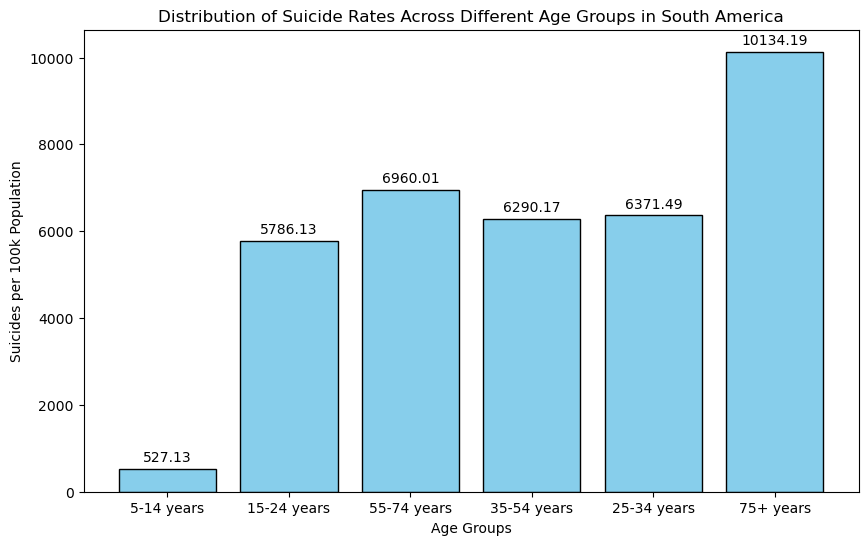

In [171]:
#Filtering South America
df_NA = df[df['continent']=='South America']

#Defining age groups order 
age_order = ['5-14 years', '15-24 years', '55-74 years', '35-54 years', '25-34 years', '75+ years']
# Convert the age group column to categorical with the defined order 
df_NA.loc[:,'age'] = pd.Categorical(df_NA['age'], categories=age_order, ordered=True)
# Grouping by the ages and calculating the mean per 100 k population
agegroup_df = df_NA.groupby(['age'],as_index=False)['suicides/100k pop'].sum()

# Maintain the age sort according to age_order
agegroup_df = agegroup_df.sort_values(by='age', key=lambda x: pd.Categorical(x, categories=age_order, ordered=True))

# # Plotting histogram 
fig, ax = plt.subplots(figsize=(10, 6)) 
bars = ax.bar(agegroup_df['age'], agegroup_df['suicides/100k pop'], color='skyblue', edgecolor='black') 

# Add values on top of each bar 
ax.bar_label(bars, fmt='%.2f', padding=3)

plt.title('Distribution of Suicide Rates Across Different Age Groups in South America') 
plt.xlabel('Age Groups') 
plt.ylabel('Suicides per 100k Population') 
plt.show()

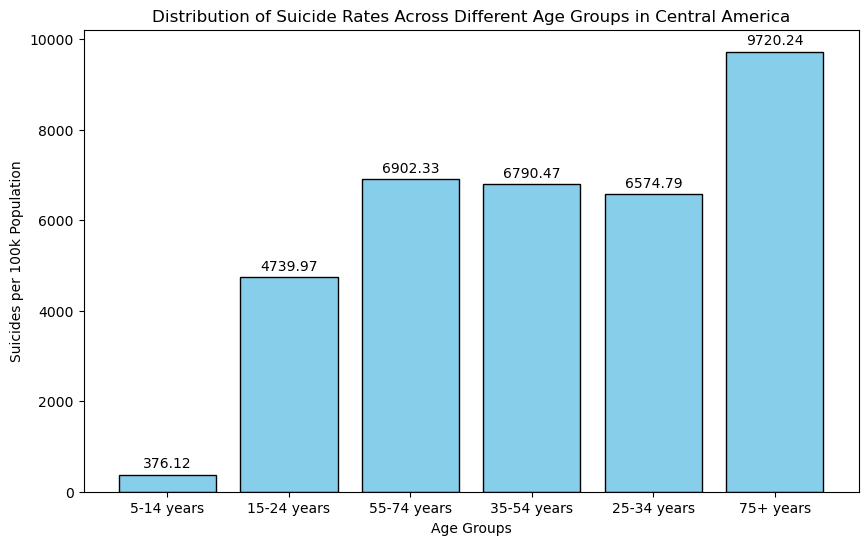

In [173]:
#Filtering Central America
df_NA = df[df['continent']=='Central America']

#Defining age groups order 
age_order = ['5-14 years', '15-24 years', '55-74 years', '35-54 years', '25-34 years', '75+ years']
# Convert the age group column to categorical with the defined order 
df_NA.loc[:,'age'] = pd.Categorical(df_NA['age'], categories=age_order, ordered=True)
# Grouping by the ages and calculating the mean per 100 k population
agegroup_df = df_NA.groupby(['age'],as_index=False)['suicides/100k pop'].sum()

# Maintain the age sort according to age_order
agegroup_df = agegroup_df.sort_values(by='age', key=lambda x: pd.Categorical(x, categories=age_order, ordered=True))

# # Plotting histogram 
fig, ax = plt.subplots(figsize=(10, 6)) 
bars = ax.bar(agegroup_df['age'], agegroup_df['suicides/100k pop'], color='skyblue', edgecolor='black') 

# Add values on top of each bar 
ax.bar_label(bars, fmt='%.2f', padding=3)

plt.title('Distribution of Suicide Rates Across Different Age Groups in Central America') 
plt.xlabel('Age Groups') 
plt.ylabel('Suicides per 100k Population') 
plt.show()

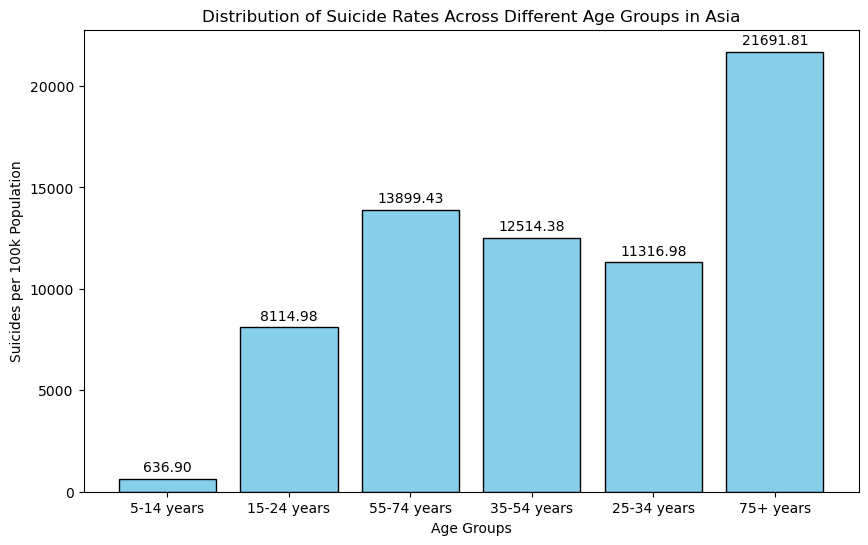

In [175]:
#Filtering Asia
df_NA = df[df['continent']=='Asia']

#Defining age groups order 
age_order = ['5-14 years', '15-24 years', '55-74 years', '35-54 years', '25-34 years', '75+ years']
# Convert the age group column to categorical with the defined order 
df_NA.loc[:,'age'] = pd.Categorical(df_NA['age'], categories=age_order, ordered=True)
# Grouping by the ages and calculating the mean per 100 k population
agegroup_df = df_NA.groupby(['age'],as_index=False)['suicides/100k pop'].sum()

# Maintain the age sort according to age_order
agegroup_df = agegroup_df.sort_values(by='age', key=lambda x: pd.Categorical(x, categories=age_order, ordered=True))

# # Plotting histogram 
fig, ax = plt.subplots(figsize=(10, 6)) 
bars = ax.bar(agegroup_df['age'], agegroup_df['suicides/100k pop'], color='skyblue', edgecolor='black') 

# Add values on top of each bar 
ax.bar_label(bars, fmt='%.2f', padding=3)

plt.title('Distribution of Suicide Rates Across Different Age Groups in Asia') 
plt.xlabel('Age Groups') 
plt.ylabel('Suicides per 100k Population') 
plt.show()

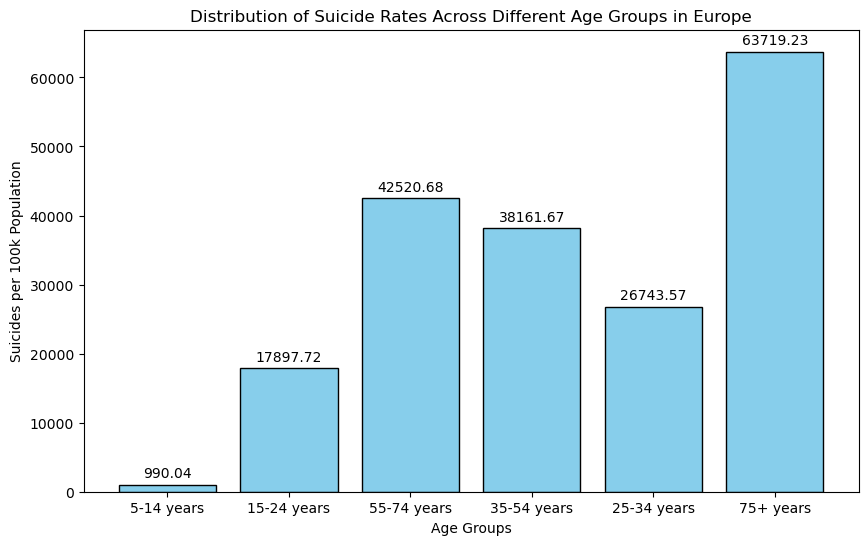

In [177]:
#Filtering Europe
df_NA = df[df['continent']=='Europe']

#Defining age groups order 
age_order = ['5-14 years', '15-24 years', '55-74 years', '35-54 years', '25-34 years', '75+ years']
# Convert the age group column to categorical with the defined order 
df_NA.loc[:,'age'] = pd.Categorical(df_NA['age'], categories=age_order, ordered=True)
# Grouping by the ages and calculating the mean per 100 k population
agegroup_df = df_NA.groupby(['age'],as_index=False)['suicides/100k pop'].sum()

# Maintain the age sort according to age_order
agegroup_df = agegroup_df.sort_values(by='age', key=lambda x: pd.Categorical(x, categories=age_order, ordered=True))

# # Plotting histogram 
fig, ax = plt.subplots(figsize=(10, 6)) 
bars = ax.bar(agegroup_df['age'], agegroup_df['suicides/100k pop'], color='skyblue', edgecolor='black') 

# Add values on top of each bar 
ax.bar_label(bars, fmt='%.2f', padding=3)

plt.title('Distribution of Suicide Rates Across Different Age Groups in Europe') 
plt.xlabel('Age Groups') 
plt.ylabel('Suicides per 100k Population') 
plt.show()

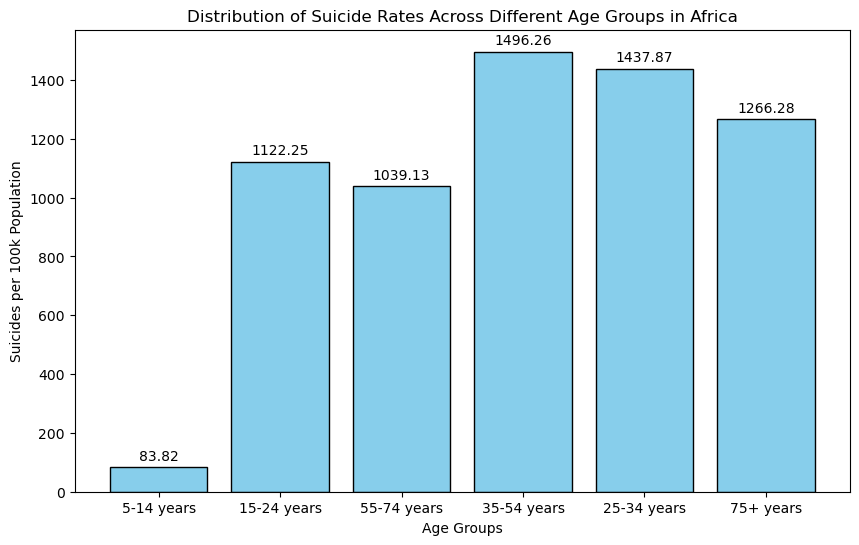

In [179]:
#Filtering Africa
df_NA = df[df['continent']=='Africa']

#Defining age groups order 
age_order = ['5-14 years', '15-24 years', '55-74 years', '35-54 years', '25-34 years', '75+ years']
# Convert the age group column to categorical with the defined order 
df_NA.loc[:,'age'] = pd.Categorical(df_NA['age'], categories=age_order, ordered=True)
# Grouping by the ages and calculating the mean per 100 k population
agegroup_df = df_NA.groupby(['age'],as_index=False)['suicides/100k pop'].sum()

# Maintain the age sort according to age_order
agegroup_df = agegroup_df.sort_values(by='age', key=lambda x: pd.Categorical(x, categories=age_order, ordered=True))

# # Plotting histogram 
fig, ax = plt.subplots(figsize=(10, 6)) 
bars = ax.bar(agegroup_df['age'], agegroup_df['suicides/100k pop'], color='skyblue', edgecolor='black') 

# Add values on top of each bar 
ax.bar_label(bars, fmt='%.2f', padding=3)

plt.title('Distribution of Suicide Rates Across Different Age Groups in Africa') 
plt.xlabel('Age Groups') 
plt.ylabel('Suicides per 100k Population') 
plt.show()

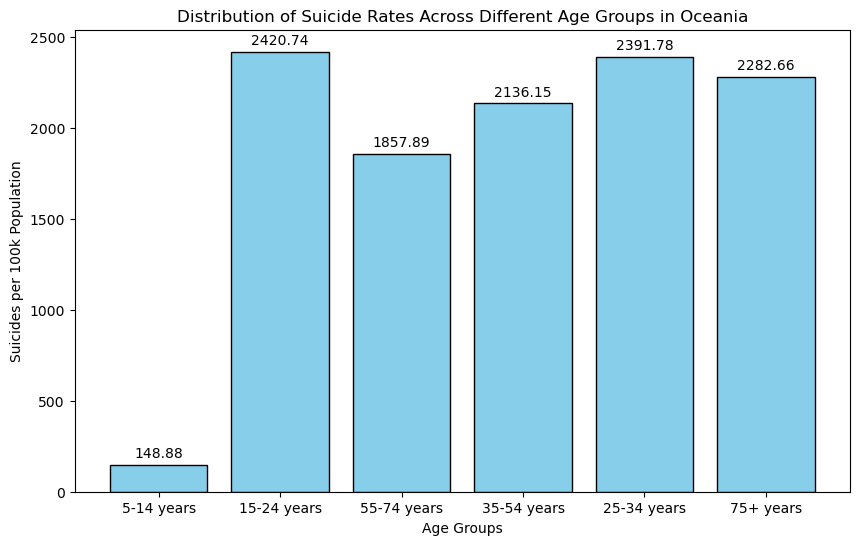

In [181]:
#Filtering Oceania
df_NA = df[df['continent']=='Oceania']

#Defining age groups order 
age_order = ['5-14 years', '15-24 years', '55-74 years', '35-54 years', '25-34 years', '75+ years']
# Convert the age group column to categorical with the defined order 
df_NA.loc[:,'age'] = pd.Categorical(df_NA['age'], categories=age_order, ordered=True)
# Grouping by the ages and calculating the mean per 100 k population
agegroup_df = df_NA.groupby(['age'],as_index=False)['suicides/100k pop'].sum()

# Maintain the age sort according to age_order
agegroup_df = agegroup_df.sort_values(by='age', key=lambda x: pd.Categorical(x, categories=age_order, ordered=True))

# # Plotting histogram 
fig, ax = plt.subplots(figsize=(10, 6)) 
bars = ax.bar(agegroup_df['age'], agegroup_df['suicides/100k pop'], color='skyblue', edgecolor='black') 

# Add values on top of each bar 
ax.bar_label(bars, fmt='%.2f', padding=3)

plt.title('Distribution of Suicide Rates Across Different Age Groups in Oceania') 
plt.xlabel('Age Groups') 
plt.ylabel('Suicides per 100k Population') 
plt.show()

### 3.10 Density plots: Suicides/100k population throughout the years 

In [188]:
df_hist = df[['year','suicides/100k pop']]

df_hist = df_hist.groupby(['year'],as_index=False)['suicides/100k pop'].sum()
df_hist.head()

,year,suicides/100k pop
0,1985,6811.89
1,1986,6579.84
2,1987,7545.45
3,1988,7473.13
4,1989,8036.54


Text(0.5, 1.0, 'Customized Histogram with Density Plot')

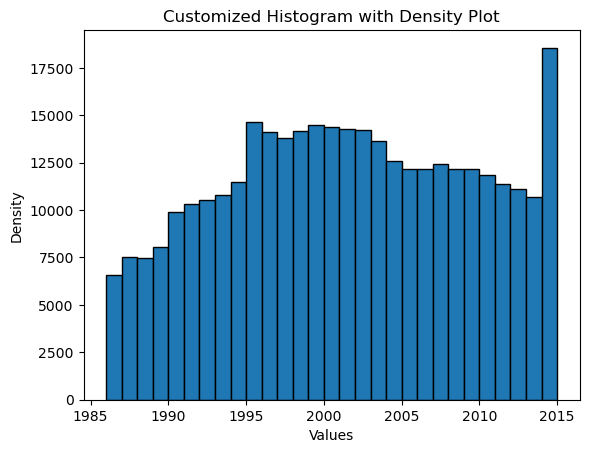

In [186]:
# # First it's necessary to calculate Sturges’ Rule to get the number of bins
# num = len(df_hist)
# bin = int(1+3.322*np.log10(num))
# bin
          
# sns.histplot(df_hist, bins=bin, kde=True, color='lightgreen', edgecolor='red')
# df_hist.hist(column='year', bins=bin, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.hist(df_hist['year'], weights=df_hist['suicides/100k pop'], bins=range(1986, 2016), edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Customized Histogram with Density Plot')

# 
The following steps are meant to dive deep on the reasons why we see a spike in 2015

In [282]:
# Calculates the mean of suicides/100k pop for every country between the years 2005 and 2015.

df_dec = df[(df['year'] >= 2005) & (df['year'] <= 2014)][['continent', 'country', 'year', 'suicides/100k pop']]
df_dec = df_dec.groupby(['country'],as_index=False)['suicides/100k pop'].mean()
df_dec.columns = ['country','suicides/100k_DECADE']
df_dec

,country,suicides/100k_DECADE
0,Albania,2.480000
1,Antigua and Barbuda,0.083125
2,Argentina,9.599000
3,Armenia,3.111019
4,Aruba,6.235952
...,...,...
91,United Arab Emirates,1.317917
92,United Kingdom,6.624833
93,United States,13.106250
94,Uruguay,20.810370


In [284]:
#Get the suicides/100k pop that happened in 2015

df_year = df[df['year'] == 2015][['country','suicides/100k pop']]
df_year = df_year.groupby(['country'],as_index=False)['suicides/100k pop'].mean()
df_year.columns = ['country', 'suicides/100k_2015']
df_year

,country,suicides/100k_2015
0,Antigua and Barbuda,1.301667
1,Argentina,9.344167
2,Armenia,3.773333
3,Australia,12.848333
4,Austria,16.218333
...,...,...
57,Turkmenistan,2.373333
58,Ukraine,20.393333
59,United Kingdom,7.228333
60,United States,14.617500


In [286]:
# Inner Join the two previous dataframes 
merged_df = pd.merge(df_dec, df_year, on='country', how='inner')
merged_df

,country,suicides/100k_DECADE,suicides/100k_2015
0,Antigua and Barbuda,0.083125,1.301667
1,Argentina,9.599000,9.344167
2,Armenia,3.111019,3.773333
3,Australia,11.222500,12.848333
4,Austria,17.906167,16.218333
...,...,...,...
57,Turkmenistan,5.785500,2.373333
58,Ukraine,22.786019,20.393333
59,United Kingdom,6.624833,7.228333
60,United States,13.106250,14.617500


In [302]:
#Calculate the variation between the columns
merged_df['Variation %'] = (((merged_df['suicides/100k_DECADE'] - merged_df['suicides/100k_2015'])/merged_df['suicides/100k_2015'])*100).round(1)
merged_df
    

,country,suicides/100k_DECADE,suicides/100k_2015,Variation,Variation %
0,Antigua and Barbuda,0.083125,1.301667,-0.936140,-93.6
1,Argentina,9.599000,9.344167,0.027272,2.7
2,Armenia,3.111019,3.773333,-0.175525,-17.6
3,Australia,11.222500,12.848333,-0.126540,-12.7
4,Austria,17.906167,16.218333,0.104069,10.4
...,...,...,...,...,...
57,Turkmenistan,5.785500,2.373333,1.437711,143.8
58,Ukraine,22.786019,20.393333,0.117327,11.7
59,United Kingdom,6.624833,7.228333,-0.083491,-8.3
60,United States,13.106250,14.617500,-0.103386,-10.3


In [306]:
# Drop a column
merged_df.drop(columns = ['Variation'])

,country,suicides/100k_DECADE,suicides/100k_2015,Variation %
0,Antigua and Barbuda,0.083125,1.301667,-93.6
1,Argentina,9.599000,9.344167,2.7
2,Armenia,3.111019,3.773333,-17.6
3,Australia,11.222500,12.848333,-12.7
4,Austria,17.906167,16.218333,10.4
...,...,...,...,...
57,Turkmenistan,5.785500,2.373333,143.8
58,Ukraine,22.786019,20.393333,11.7
59,United Kingdom,6.624833,7.228333,-8.3
60,United States,13.106250,14.617500,-10.3


In [310]:
#Get the statistics of the dataframe to determine a threshold for those high variations
merged_df.describe()

,suicides/100k_DECADE,suicides/100k_2015,Variation,Variation %
count,62.000000,62.000000,62.000000,62.000
mean,12.156641,11.094073,inf,inf
std,8.372213,7.121287,NaN,NaN
min,0.083125,0.000000,-0.936140,-93.600
25%,6.030417,6.013542,-0.048466,-4.850
50%,10.982000,10.347917,0.058339,5.850
75%,17.366167,15.798750,0.191335,19.125
max,38.568750,32.428333,inf,inf


In [314]:
#Get the maximum value of a specific column
merged_df['Variation %'].max()

inf

In [326]:
#Get the minimum value of a specific column
merged_df['suicides/100k_2015'].min()

0.0

In [330]:
#Get the number of rows where a specific column is equal to zero.
(merged_df['suicides/100k_2015'] == 0).sum()

1

In [338]:
#Filter row different from zero
merged_df = merged_df[merged_df['suicides/100k_2015'] != 0]

In [340]:
#Now, get the statistics for the dataframe

merged_df.describe()

,suicides/100k_DECADE,suicides/100k_2015,Variation,Variation %
count,61.000000,61.000000,61.000000,61.000000
mean,12.320713,11.275943,0.088448,8.845902
std,8.340585,7.033705,0.317364,31.734637
min,0.083125,1.083333,-0.936140,-93.600000
25%,6.032417,6.454167,-0.050948,-5.100000
50%,11.222500,10.577500,0.056813,5.700000
75%,17.633333,16.192500,0.189353,18.900000
max,38.568750,32.428333,1.437711,143.800000


In [344]:
#Define the outliers in the 'Variation' column
low = merged_df['Variation %'].mean() - 3 * merged_df['Variation %'].std()
high = merged_df['Variation %'].mean() + 3 * merged_df['Variation %'].std()

outliers = merged_df[(merged_df['Variation %'] < low) | (merged_df['Variation %'] > high)]
outliers


,country,suicides/100k_DECADE,suicides/100k_2015,Variation,Variation %
0,Antigua and Barbuda,0.083125,1.301667,-0.936140,-93.6
46,Saint Vincent and Grenadines,5.232667,2.340000,1.236182,123.6
57,Turkmenistan,5.785500,2.373333,1.437711,143.8


Text(0.5, 1.0, 'Customized Histogram with Density Plot_Exclusing outliers')

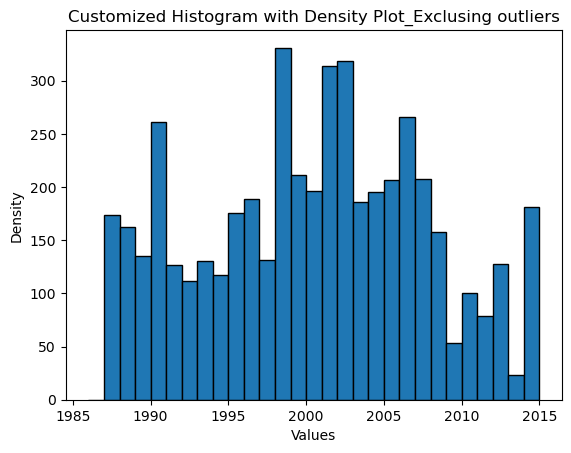

In [356]:
#Plot the density chart excluding the outliers
df_No_Outliers = df[
                    ((df['year'] <= 2015) | (df['year'] >= 2005)) & 
                    ((df['country'] == 'Antigua and Barbuda') |
                     (df['country'] == 'Saint Vincent and Grenadines') | 
                     (df['country'] == 'Turkmenistan'))
                    ]

df_No_Outliers = df_No_Outliers[['year','suicides/100k pop']]

# df_hist[df_hist[

plt.hist(df_No_Outliers['year'], weights=df_No_Outliers['suicides/100k pop'], bins=range(1986, 2016), edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Customized Histogram with Density Plot_Exclusing outliers')


Text(0.5, 1.0, 'Oceania: Customized Histogram with Density Plot')

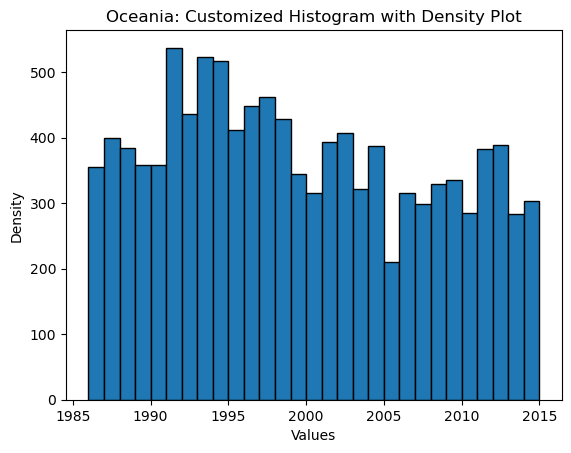

In [134]:
#Filtering Oceania
df_NA = df[df['continent']=='Oceania']

plt.hist(df_NA['year'], weights=df_NA['suicides/100k pop'], bins=range(1986, 2016), edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Oceania: Customized Histogram with Density Plot')

In [ ]:
df_NA = df_NA.groupby(['year','country'],as_index=False)['suicides/100k pop'].sum()
df_NA.head()

Text(0.5, 1.0, 'Asia: Customized Histogram with Density Plot')

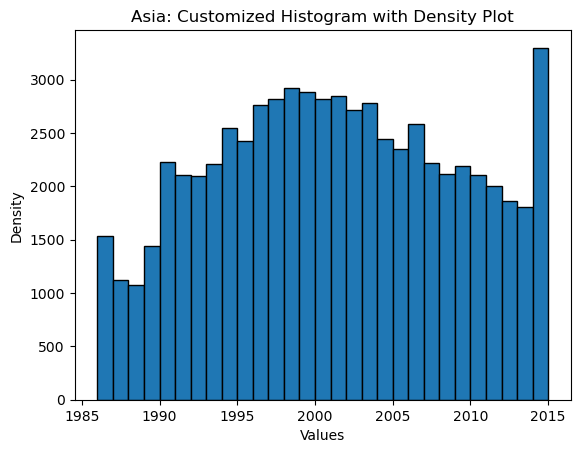

In [135]:
#Filtering Asia
df_NA = df[df['continent']=='Asia']

plt.hist(df_NA['year'], weights=df_NA['suicides/100k pop'], bins=range(1986, 2016), edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Asia: Customized Histogram with Density Plot')

Text(0.5, 1.0, 'Africa: Customized Histogram with Density Plot')

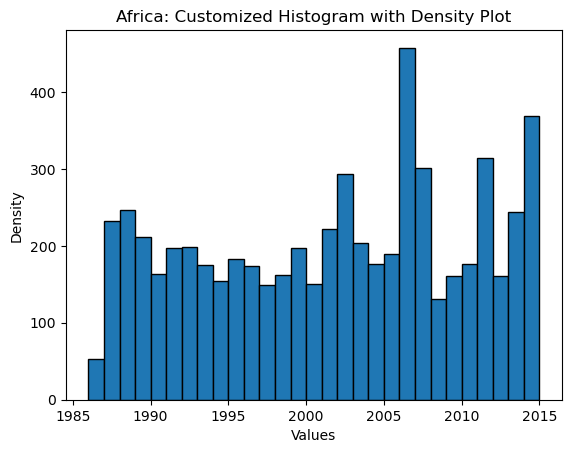

In [136]:
#Filtering Africa
df_NA = df[df['continent']=='Africa']

plt.hist(df_NA['year'], weights=df_NA['suicides/100k pop'], bins=range(1986, 2016), edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Africa: Customized Histogram with Density Plot')

Text(0.5, 1.0, 'Europe: Customized Histogram with Density Plot')

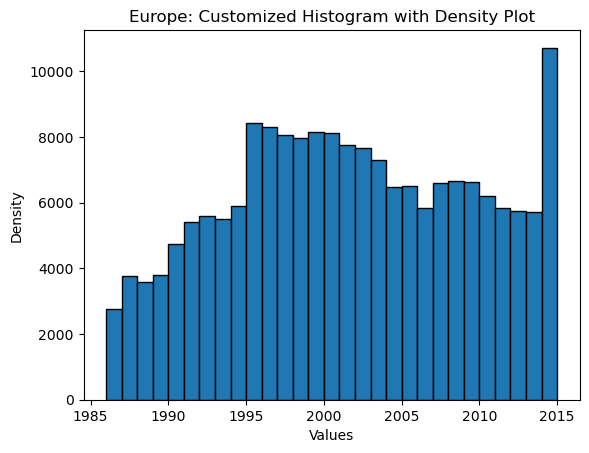

In [137]:
#Filtering Europe
df_NA = df[df['continent']=='Europe']

plt.hist(df_NA['year'], weights=df_NA['suicides/100k pop'], bins=range(1986, 2016), edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Europe: Customized Histogram with Density Plot')

Text(0.5, 1.0, 'North America: Customized Histogram with Density Plot')

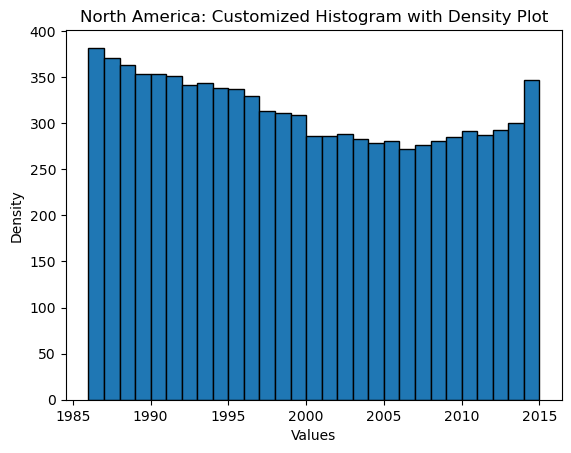

In [139]:
#Filtering North America
df_NA = df[df['continent']=='North America']

plt.hist(df_NA['year'], weights=df_NA['suicides/100k pop'], bins=range(1986, 2016), edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('North America: Customized Histogram with Density Plot')

Text(0.5, 1.0, 'Central America: Customized Histogram with Density Plot')

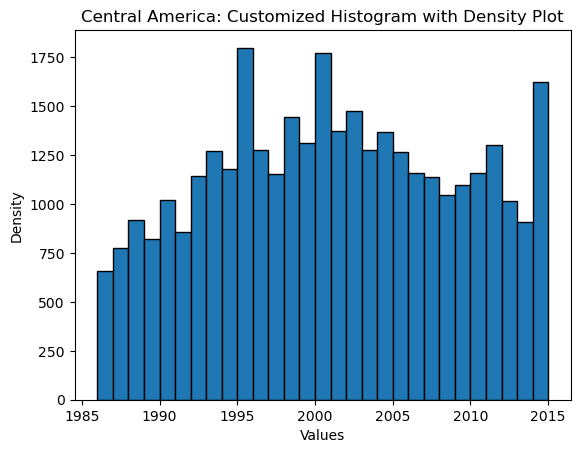

In [142]:
#Filtering Central America
df_NA = df[df['continent']=='Central America']

plt.hist(df_NA['year'], weights=df_NA['suicides/100k pop'], bins=range(1986, 2016), edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Central America: Customized Histogram with Density Plot')

Text(0.5, 1.0, 'South America: Customized Histogram with Density Plot')

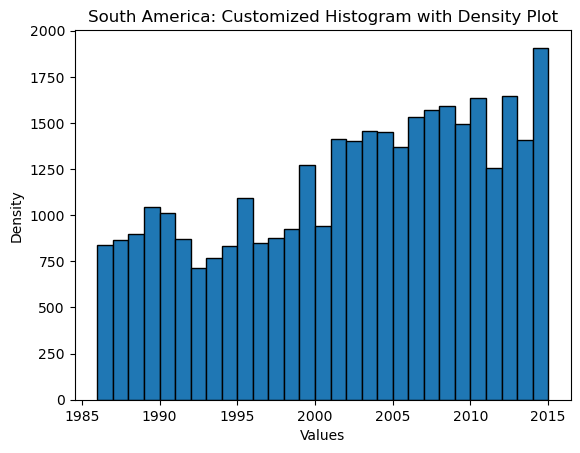

In [144]:
#Filtering South America
df_NA = df[df['continent']=='South America']

plt.hist(df_NA['year'], weights=df_NA['suicides/100k pop'], bins=range(1986, 2016), edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('South America: Customized Histogram with Density Plot')

### 3.11 Correlation Matrix

In [151]:
#First, let's ensure removal of any leading or trailing spaces from the column names of the dataframe

df.rename(columns=lambda x: x.strip(), inplace=True)  # Strip spaces from column names

#Remove commas and convert the column to floats:
df['gdp_for_year($)'] = df['gdp_for_year($)'].str.replace(',', '').astype(float)


In [159]:
df_corr = df[['suicides_no','population','suicides/100k pop','HDI for year','gdp_for_year($)','gdp_per_capita($)','z_score']]
df_corr.head(5)

,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year($),gdp_per_capita($),z_score
0,21,312900,6.71,NaN,2.156625e+09,796,1.608952
1,16,308000,5.19,NaN,2.156625e+09,796,1.014711
2,14,289700,4.83,NaN,2.156625e+09,796,0.777015
3,1,21800,4.59,NaN,2.156625e+09,796,-0.768011
4,9,274300,3.28,NaN,2.156625e+09,796,0.182774


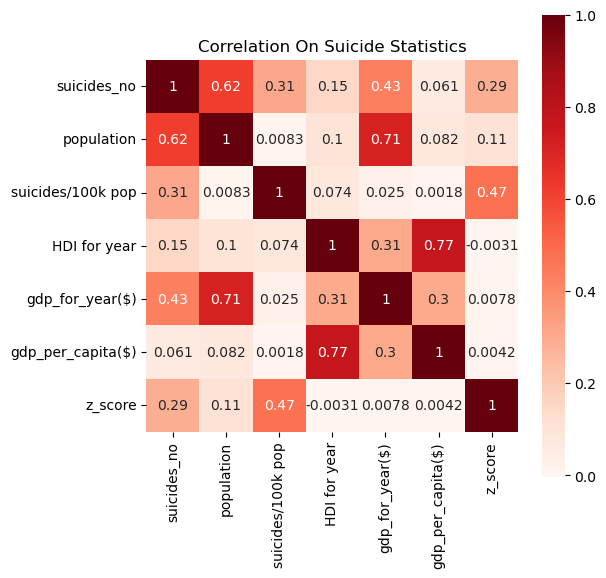

In [167]:
# correlation_matrix = df_corr.corr()
# correlation_matrix

# Check the correlation between the columns
# Create a new figure for the heatmap 
plt.figure(figsize = (6,6))

# Generate the heatmap visualization
# annot=True: This parameter specifies that  cell values in the heatmap should be annotated (displayed) on the heatmap cells
# square=True: This parameter ensures that the heatmap cells are square
# cmap="Reds": This parameter sets the color map to "Reds".
sns.heatmap(df_corr.corr(), annot=True, square=True, cmap="Reds")
plt.title('Correlation On Suicide Statistics')
plt.show()

In [170]:
# sns.pairplot(data=df,hue='country')

# Analysis 4. Regression Analysis: Predicting Suicide Rates

In [173]:
# Feature Selection: The following features like GDP, Population, GDP per capita, Age, are likely predictors of suicide rates.

df_features = df[['country', 'continent', 'sex', 'age', 'generation']]
df_dummies_features = pd.get_dummies(df_features, columns=['country', 'continent', 'sex', 'age', 'generation'])
df_target = df[['suicides/100k pop']]
#Do I need to normalize the target variable? No. It's already standardize since it shows number of suicides per 100k population

In [175]:
df_features.head(8)

,country,continent,sex,age,generation
0,Albania,Europe,male,15-24 years,Generation X
1,Albania,Europe,male,35-54 years,Silent
2,Albania,Europe,female,15-24 years,Generation X
3,Albania,Europe,male,75+ years,G.I. Generation
4,Albania,Europe,male,25-34 years,Boomers
5,Albania,Europe,female,75+ years,G.I. Generation
6,Albania,Europe,female,35-54 years,Silent
7,Albania,Europe,female,25-34 years,Boomers


In [177]:
df_dummies_features.dtypes

country_Albania                bool
country_Antigua and Barbuda    bool
country_Argentina              bool
country_Armenia                bool
country_Aruba                  bool
                               ... 
generation_G.I. Generation     bool
generation_Generation X        bool
generation_Generation Z        bool
generation_Millenials          bool
generation_Silent              bool
Length: 122, dtype: object

In [179]:
# Convert boolean columns to integers
bool_columns = df_dummies_features.select_dtypes(include=['bool']).columns
df_dummies_features[bool_columns] = df_dummies_features[bool_columns].astype(int)

In [181]:
df_dummies_features.dtypes

country_Albania                int32
country_Antigua and Barbuda    int32
country_Argentina              int32
country_Armenia                int32
country_Aruba                  int32
                               ...  
generation_G.I. Generation     int32
generation_Generation X        int32
generation_Generation Z        int32
generation_Millenials          int32
generation_Silent              int32
Length: 122, dtype: object

In [183]:
df_dummies_features.head(8)

,country_Albania,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,...,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### 4.1 Linear Regression

Linear Regression is the most basic form of regression and assumes a linear relationship between the independent variables and the target variable.

In [195]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
X = df_dummies_features
y = df_target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model

R_Squared = r2_score(y_test, y_pred)
Mean_Squared_Error = mean_squared_error(y_test, y_pred)

print(f'R-squared:', R_Squared)
print(f'Mean Squared Error:', Mean_squared_error)

R-squared: 0.5061254995892643
Mean Squared Error: 172.58897650896807


### 4.2 Ridge Regression

Ridge Regression is a type of linear regression that includes a regularization term to prevent overfitting. The regularization term is controlled by the parameter alpha.

In [229]:
from sklearn.linear_model import Ridge

# Create and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model

R_Squared_Ridge = r2_score(y_test, y_pred_ridge)
Mean_Squared_Error_Ridge = mean_squared_error(y_test, y_pred_ridge)

print(f'R-squared:', R_Squared_Ridge)
print(f'Mean Squared Error:', Mean_Squared_Error_Ridge)


R-squared: 0.5062631239487922
Mean Squared Error: 172.5408824135372


### 4.3 Lasso Regression

Lasso Regression is similar to Ridge Regression but uses an L1 regularization term, which can shrink some coefficients to zero. This makes Lasso Regression useful for feature selection.

In [233]:
from sklearn.linear_model import Lasso

# Create and train the Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
R_Squared_Lasso = r2_score(y_test, y_pred_lasso)
print(f'R-squared:',R_Squared_Lasso)
Mean_Squared_Error_Lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error:', Mean_Squared_Error_Lasso)


R-squared: 0.40994142883415163
Mean Squared Error: 206.2013827261047


In [249]:
# Comparing MSE and R2 scores
print(f'Linear regression:')
print(f'R-Squared Error', R_Squared)
print(f'Mean Squared Error', Mean_Squared_Error)
print(f'\n')
print(f'Ridge regression:')
print(f'R-Squared Error', R_Squared_Ridge)
print(f'Mean Squared Error', Mean_Squared_Error_Ridge)
print(f'\n')
print(f'Lasso regression:')
print(f'R-Squared Error', R_Squared_Lasso)
print(f'Mean Squared Error', Mean_Squared_Error_Lasso)

Linear regression:
R-Squared Error 0.5061254995892643
Mean Squared Error 172.58897650896807


Ridge regression:
R-Squared Error 0.5062631239487922
Mean Squared Error 172.5408824135372


Lasso regression:
R-Squared Error 0.40994142883415163
Mean Squared Error 206.2013827261047
